                                    About Dataset
Context:
This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

Columns:

Education: The educational qualifications of employees, including degree, institution, and field of study.

Joining Year: The year each employee joined the company, indicating their length of service.

City: The location or city where each employee is based or works.

Payment Tier: Categorization of employees into different salary tiers.

Age: The age of each employee, providing demographic insights.

Gender: Gender identity of employees, promoting diversity analysis.

Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

Experience in Current Domain: The number of years of experience employees have in their current field.

Leave or Not: a target column

Usage:
This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.

Potential Research Questions:

What is the distribution of educational qualifications among employees?
How does the length of service (Joining Year) vary across different cities?
Is there a correlation between Payment Tier and Experience in Current Domain?
What is the gender distribution within the workforce?
Are there any patterns in leave-taking behavior among employees?
Acknowledgments:
We would like to acknowledge the contributions of our HR department in providing this dataset for research and analysis purposes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Employee.csv')
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
df.shape

(4653, 9)

In [7]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [8]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [11]:
df.duplicated().sum()

1889

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(2764, 9)

# Lets check the unique values in the categorical columns¶


In [17]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [18]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [19]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [52]:
df['LeaveOrNot'].unique()

array([0, 1], dtype=int64)

In [21]:
df['EverBenched'].unique()

array(['No', 'Yes'], dtype=object)

# Exploratory Data Analysis¶

In [61]:
df.groupby(['Education'])['LeaveOrNot'].value_counts()

Education  LeaveOrNot
Bachelors  0             1232
           1              739
Masters    0              328
           1              309
PHD        0              116
           1               40
Name: LeaveOrNot, dtype: int64

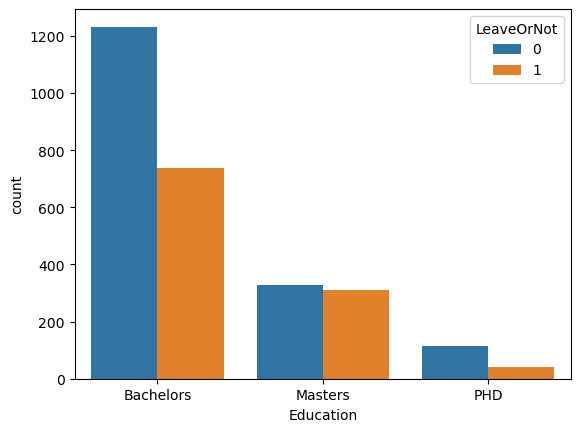

In [60]:
sns.countplot(df,x='Education',hue='LeaveOrNot');

In [62]:
df.groupby(['City'])['LeaveOrNot'].value_counts()

City       LeaveOrNot
Bangalore  0             761
           1             410
New Delhi  0             522
           1             270
Pune       1             408
           0             393
Name: LeaveOrNot, dtype: int64

<Axes: xlabel='City', ylabel='count'>

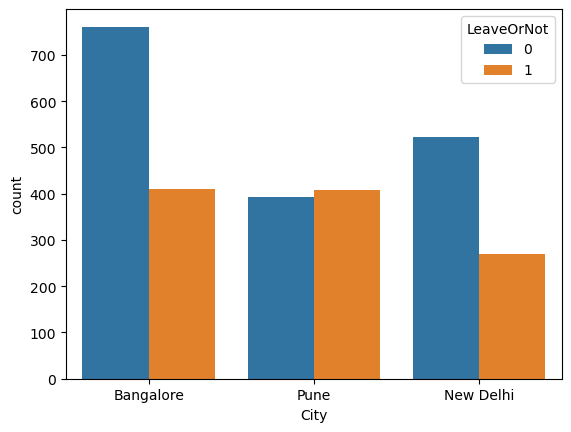

In [58]:
sns.countplot(df,x='City',hue='LeaveOrNot')

In [64]:
df.groupby(['Gender'])['LeaveOrNot'].value_counts()

Gender  LeaveOrNot
Female  0              621
        1              614
Male    0             1055
        1              474
Name: LeaveOrNot, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

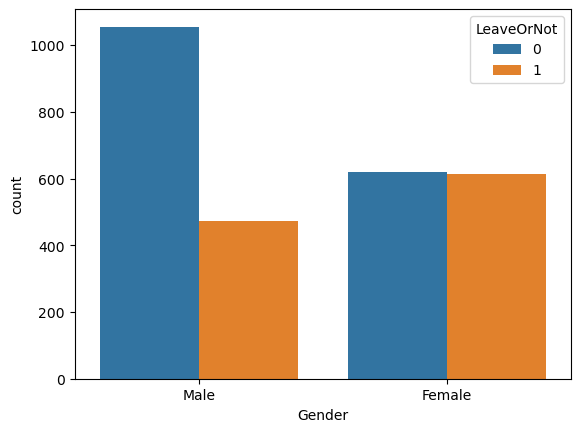

In [63]:
sns.countplot(df,x='Gender',hue='LeaveOrNot')

In [66]:
df.groupby(['EverBenched'])['LeaveOrNot'].value_counts()

EverBenched  LeaveOrNot
No           0             1474
             1              929
Yes          0              202
             1              159
Name: LeaveOrNot, dtype: int64

<Axes: xlabel='EverBenched', ylabel='count'>

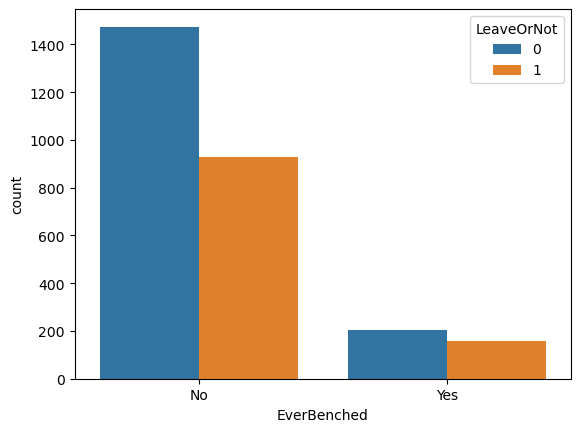

In [68]:
sns.countplot(df,x='EverBenched',hue='LeaveOrNot')

<Axes: xlabel='JoiningYear', ylabel='Count'>

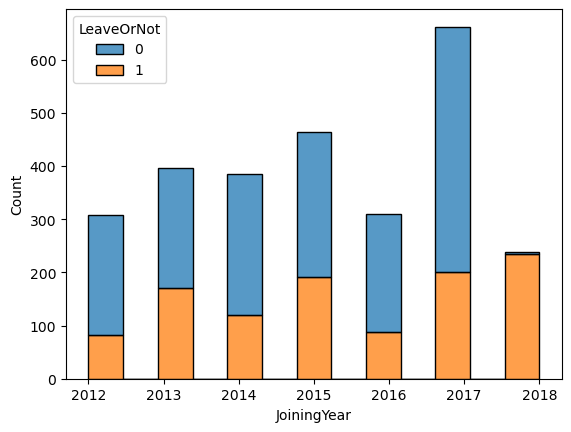

In [78]:
sns.histplot(data=df, x=df["JoiningYear"],
hue="LeaveOrNot", multiple="stack")

<Axes: xlabel='PaymentTier', ylabel='Count'>

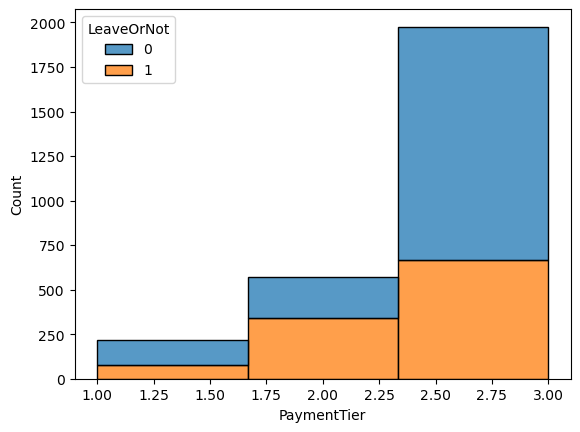

In [83]:
sns.histplot(data=df, x=df["PaymentTier"],hue="LeaveOrNot", bins=3, multiple="stack")

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='Count'>

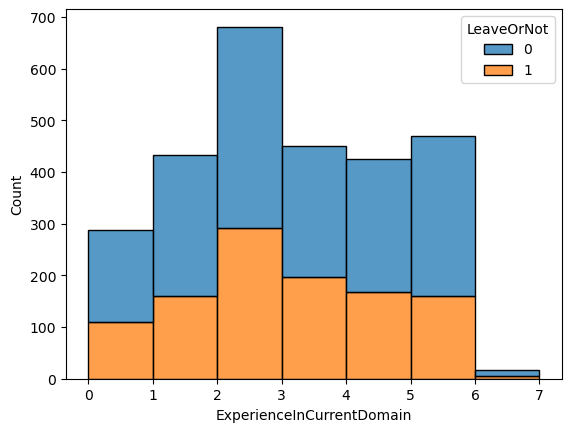

In [86]:
sns.histplot(data=df, x=df["ExperienceInCurrentDomain"],hue="LeaveOrNot", bins=7, multiple="stack")